In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from autoencoder import AutoEncoder, VariationalAutoEncoder, LSTMAutoEncoder
import resources
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import PurePosixPath as Path
from tensorflow.keras.models import Model

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/tomje/miniconda3/envs/tf/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# Load in RMS data for tests

In [2]:
exps = ['Test 5', 'Test 7', 'Test 8', 'Test 9']
# exps = ['Test 5']
rms = {}

for test in exps:
    rms[test] = resources.ae.RMS(test)
    rms[test].data.drop(['0', '1', '2',], axis=1, inplace=True)
    
try:
    rms['Test 5'].data.drop(['23', '24'], axis=1, inplace=True)
except KeyError:
    pass

--------------------------------------------------
Loaded RMS data for "22_08_03_grit1000"
Experiemnt No: Test 5
Number of files: 213
--------------------------------------------------
--------------------------------------------------
Loaded RMS data for "22_11_07_weartest_1000"
Experiemnt No: Test 7
Number of files: 163
--------------------------------------------------
--------------------------------------------------
Loaded RMS data for "22_11_09_weartest_1000"
Experiemnt No: Test 8
Number of files: 176
--------------------------------------------------
--------------------------------------------------
Loaded RMS data for "22_11_30_weartest_1000"
Experiemnt No: Test 9
Number of files: 158
--------------------------------------------------


In [3]:
def remove_dc(sig):
    return sig - np.nanmean(sig)

for test in exps:
    rms[test]._data = rms[test].data.iloc[50:350, :].reset_index(drop=True)
    rms[test]._data = rms[test].data.apply(remove_dc, axis=0)

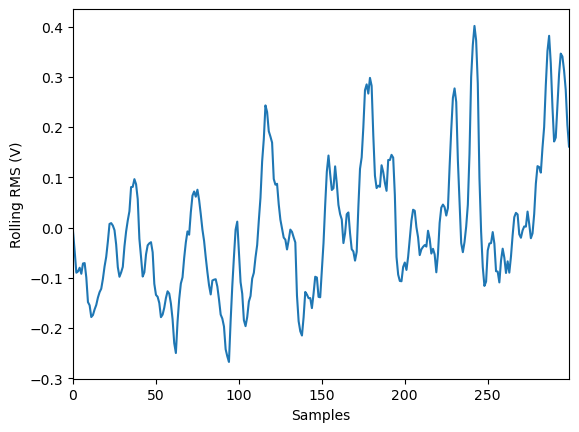

In [4]:
r = rms[test].data.values
r.shape
plt.plot(r[:, 43])
plt.xlabel('Samples')
plt.ylabel('Rolling RMS (V)')
plt.autoscale(enable=True, axis='x', tight=True)
# plt.plot(r[:, 120])
# plt.plot(r[:, 145])

# Setup Variational Autoencoder for each Test
- The model is trained over a small section of the test depending on `train_slice`.
- The model parameters are specified within the `params` dict.

In [5]:
autoe = {}
for test in exps:
        """
        autoe[test] = VariationalAutoEncoder(rms[test],
                                           tb=False,
                                           tb_logdir=rms[test].exp_name,
                                           train_slice=(0, 75),
                                        #    random_state=1,
                                           val_frac=0.33,
                                           params={'latent_dim': 4,
                                                   'n_size': [64, 32],
                                                   'epochs': 1000,
                                                   'batch_size': 15,
                                                   'callbacks': [
                                                           tf.keras.callbacks.EarlyStopping(
                                                                monitor='val_loss',
                                                                patience=60,
                                                                mode='min',
                                                                start_from_epoch=100,
                                                           ),
                                                        ]
                                                   }
                                           )
        """
        '''
        autoe[test] = AutoEncoder(rms[test],
                                  tb=False,
                                  tb_logdir=rms[test].exp_name.upper().replace(' ', '_'),
                                  train_slice=(0, 50),
                                  val_frac=0.33,
                                  random_state=2,
                                  params={'n_bottleneck': 9,
                                          'n_size': [42, 32, 16],
                                          'epochs': 1000,
                                          'batch_size': 40,
                                          'loss': 'mse',
                                          'callbacks': [
                                                  tf.keras.callbacks.EarlyStopping(
                                                              monitor='val_loss',
                                                              patience=80,
                                                              mode='min',
                                                              start_from_epoch= 150,
                                                  ),
                                                #   tf.keras.callbacks.ReduceLROnPlateau(
                                                #                 monitor='val_loss',
                                                #                 mode='min',
                                                #                 patience=25,
                                                #                 factor=0.01,
                                                #   ),
                                                ]

                                          }
                                  )                                
        '''
        autoe[test] = LSTMAutoEncoder(rms[test],
                                      tb=True,
                                      tb_logdir='LSTMAE_test',
                                      train_slice=(0, 60),
                                      val_frac=0.33,
                                      params={'epochs': 300,
                                              'batch_size': 64,
                                              'n_size': [256, 128, 64],
                                              'seq_len': 100,
                                              'n_bottleneck': 32,
                                              'loss': 'mean_squared_error',
                                              'callbacks': [
                                                      tf.keras.callbacks.EarlyStopping(
                                                        monitor='val_loss',
                                                        patience=10,
                                                        mode='min',
                                                        start_from_epoch= 150,
                                                        ),
                                                 ]
                                      }
                                )

Pre-processing Data:
	Combining RMS data...
	Number of RMS samples: (62400, 1)

	Training Data: slice(0, 60, None)
	Input train shape: (12060, 1)
	Input val shape: (5940, 1)

LSTMAE-Test_5-WIN-100-E-300-L-[256, 128, 64, 32, 64, 128, 256]-20230724-162426

Pre-processing Data:
	Combining RMS data...
	Number of RMS samples: (48000, 1)

	Training Data: slice(0, 60, None)
	Input train shape: (12060, 1)
	Input val shape: (5940, 1)

LSTMAE-Test_7-WIN-100-E-300-L-[256, 128, 64, 32, 64, 128, 256]-20230724-162426

Pre-processing Data:
	Combining RMS data...
	Number of RMS samples: (51900, 1)

	Training Data: slice(0, 60, None)
	Input train shape: (12060, 1)
	Input val shape: (5940, 1)

LSTMAE-Test_8-WIN-100-E-300-L-[256, 128, 64, 32, 64, 128, 256]-20230724-162426

Pre-processing Data:
	Combining RMS data...
	Number of RMS samples: (46500, 1)

	Training Data: slice(0, 60, None)
	Input train shape: (12060, 1)
	Input val shape: (5940, 1)

LSTMAE-Test_9-WIN-100-E-300-L-[256, 128, 64, 32, 64, 128, 25

In [6]:
platform = os.name
if platform == 'nt':
    onedrive = Path(r'C:\Users\tomje\OneDrive - Cardiff University')
    onedrive = onedrive.joinpath('Documents', 'PHD', 'AE')
    TB_DIR= onedrive.joinpath('Tensorboard')
elif platform == 'posix':
    onedrive = Path(r'/mnt/c/Users/tomje/OneDrive - Cardiff University')
    onedrive = onedrive.joinpath('Documents', 'PHD', 'AE')
    TB_DIR= onedrive.joinpath('Tensorboard')
print(TB_DIR)

/mnt/c/Users/tomje/OneDrive - Cardiff University/Documents/PHD/AE/Tensorboard


In [7]:
# add model checkpoint callback after creating model
for test in exps:
    name = autoe[test].run_name
    model_folder = TB_DIR.joinpath(autoe[test]._tb_logdir.joinpath(name))
    if not os.path.exists(model_folder):
       os.makedirs(model_folder)
    assert os.path.exists(model_folder)

    autoe[test].model.callbacks.append(
        tf.keras.callbacks.ModelCheckpoint(
        filepath=model_folder.joinpath(f'{name}.h5'),
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        save_weights_only=True,
        )
    )

# Train each autoe on the training data
- `x` is the inputted data for training, which is `autoe.train_data`
- `val_data` is the validation data from `autoe.val_data`

In [8]:
for test in exps:
        autoe[test].fit(x=autoe[test].train_data,
                        val_data=autoe[test].val_data,
                        verbose=0,
                        use_multiprocessing=True,
                        )

Training:   0%|           0/300 ETA: ?s,  ?epochs/s

Training:   0%|           0/300 ETA: ?s,  ?epochs/s

Training:   0%|           0/300 ETA: ?s,  ?epochs/s

Training:   0%|           0/300 ETA: ?s,  ?epochs/s

## Reload saved weights from best model

In [9]:
for test in exps:
    name = autoe[test].run_name
    model_folder = TB_DIR.joinpath(autoe[test]._tb_logdir.joinpath(name))
    autoe[test].model.model_.load_weights(
        TB_DIR.joinpath(model_folder.joinpath(f'{name}.h5'),),
    )
    autoe[test].pred = None
    autoe[test].scores = None

# Results Visualisation

## Loss plot of each trained model

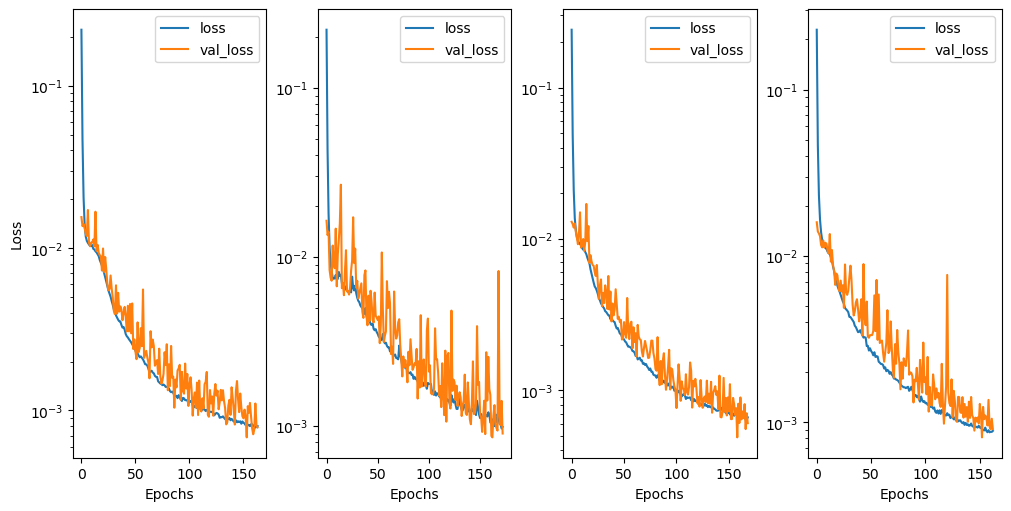

In [10]:
fig, ax = plt.subplots(1, len(exps),
                       figsize=(10,5),
                       constrained_layout=True,
                       )
# ax = ax.ravel()
for i, test in enumerate(exps):
    axis = fig.axes[i]
    autoe[test].loss_plot(plt_ax=axis)
    axis.set_yscale('log')
    if i > 0:
        axis.set_ylabel('')

## Score each model
- Models scored on train, validation and whole dataset

In [11]:
for test in exps:
    autoe[test].scores = None
    autoe[test].pred = None

In [12]:
for test in exps:
    print(f'\n {test}')
    pred_tr, scores_tr = autoe[test].score('train')
    pred_val, scores_val = autoe[test].score('val')
    pred_data, scores_data = autoe[test].score('dataset')


 Test 5

Predicting data:
974/974 [==============================] - 243s 248ms/step

Train Scores:
	MAE: 0.01924
	MSE: 0.00061
	R2: 0.94296

Predicting data:

Val Scores:
	MAE: 0.02033
	MSE: 0.00068
	R2: 0.93618

Predicting data:

Dataset Scores:
	MAE: 0.04663
	MSE: 0.00793
	R2: 0.86160

 Test 7

Predicting data:
749/749 [==============================] - 187s 248ms/step

Train Scores:
	MAE: 0.02112
	MSE: 0.00080
	R2: 0.90544

Predicting data:

Val Scores:
	MAE: 0.02186
	MSE: 0.00086
	R2: 0.89987

Predicting data:

Dataset Scores:
	MAE: 0.03629
	MSE: 0.00281
	R2: 0.74070

 Test 8

Predicting data:
810/810 [==============================] - 202s 248ms/step

Train Scores:
	MAE: 0.01607
	MSE: 0.00043
	R2: 0.95135

Predicting data:

Val Scores:
	MAE: 0.01701
	MSE: 0.00049
	R2: 0.94641

Predicting data:

Dataset Scores:
	MAE: 0.03814
	MSE: 0.01870
	R2: 0.89634

 Test 9

Predicting data:
726/726 [==============================] - 181s 247ms/step

Train Scores:
	MAE: 0.02133
	MSE: 0.00075
	

## Show histogram of scores across training dataset

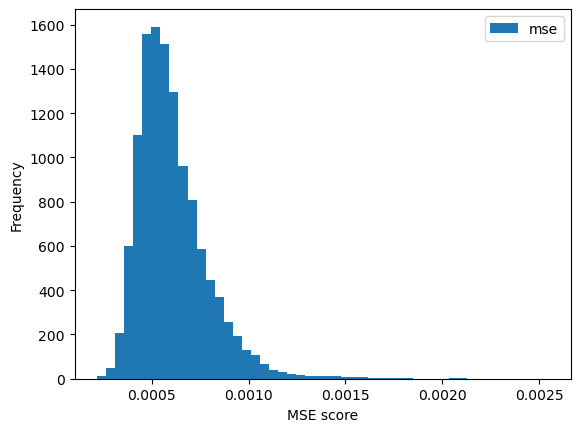

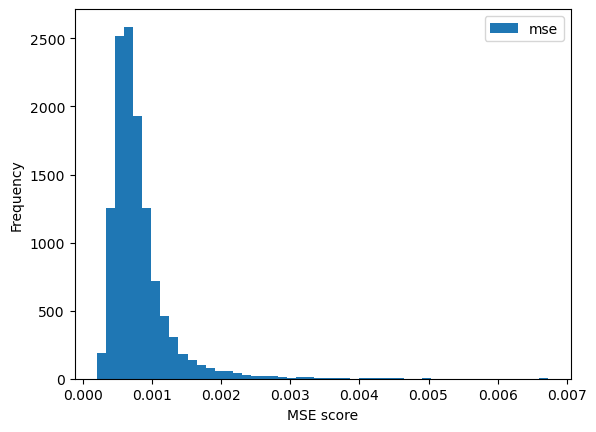

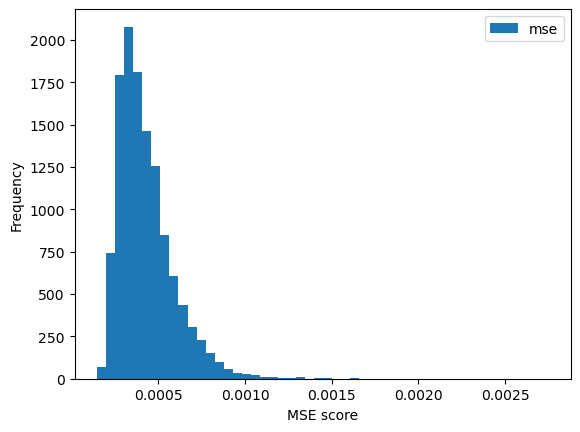

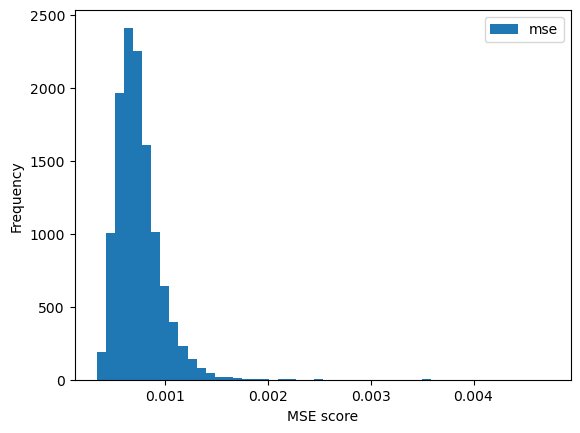

In [13]:
for test in exps:
    fig, ax = autoe[test].hist_scores(['mse'])

## Show model recreation capability of training and validation sets

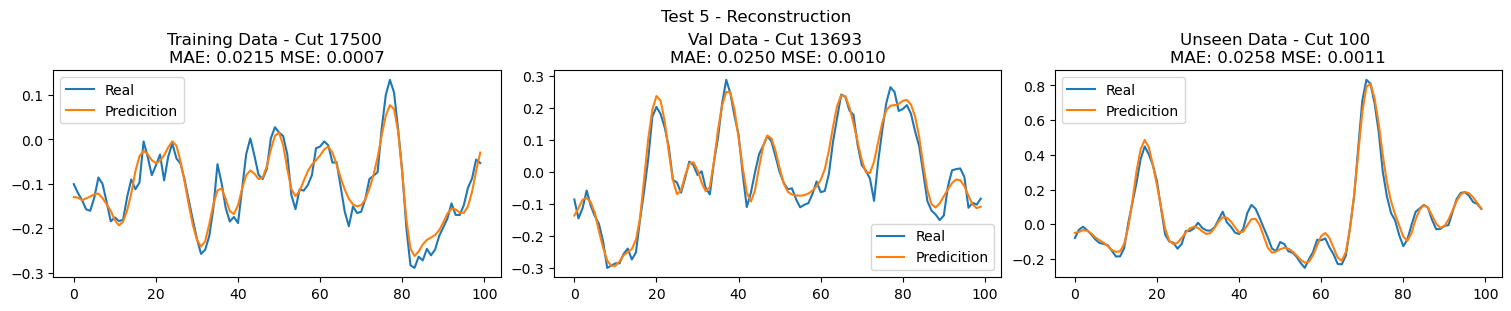

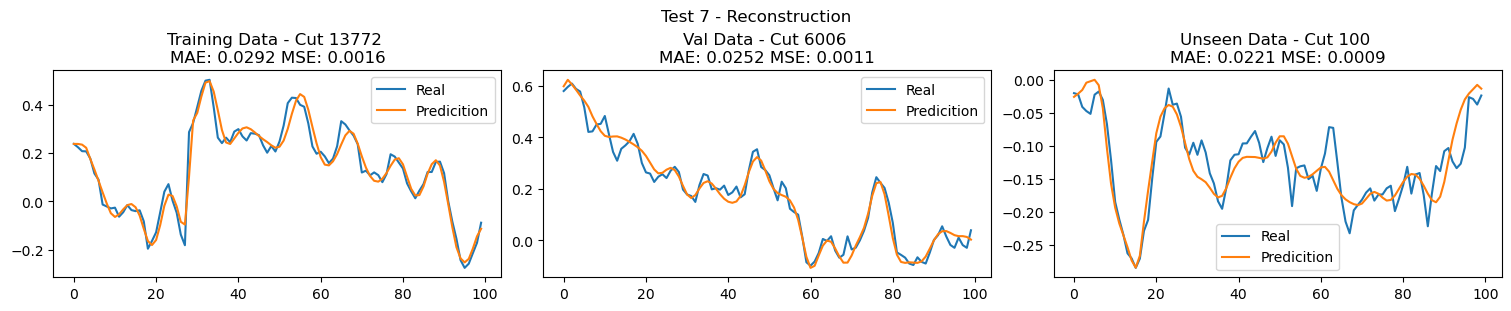

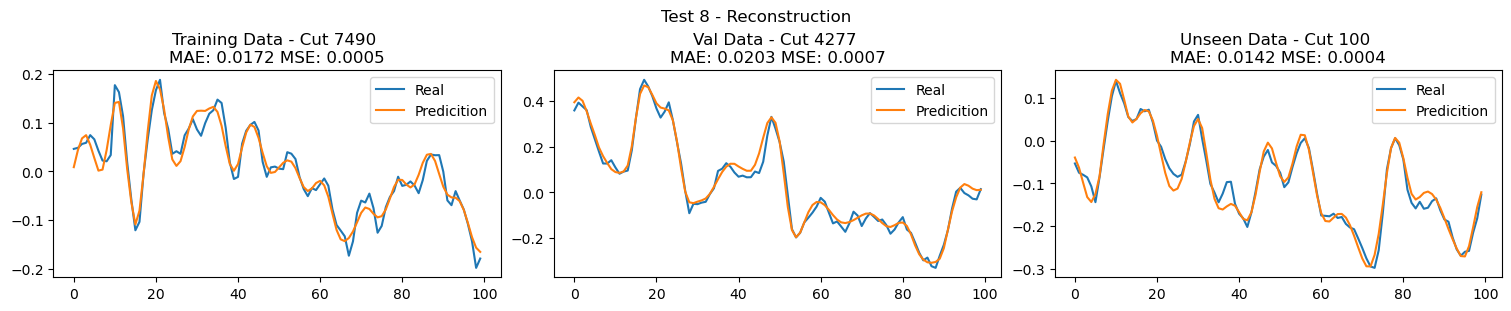

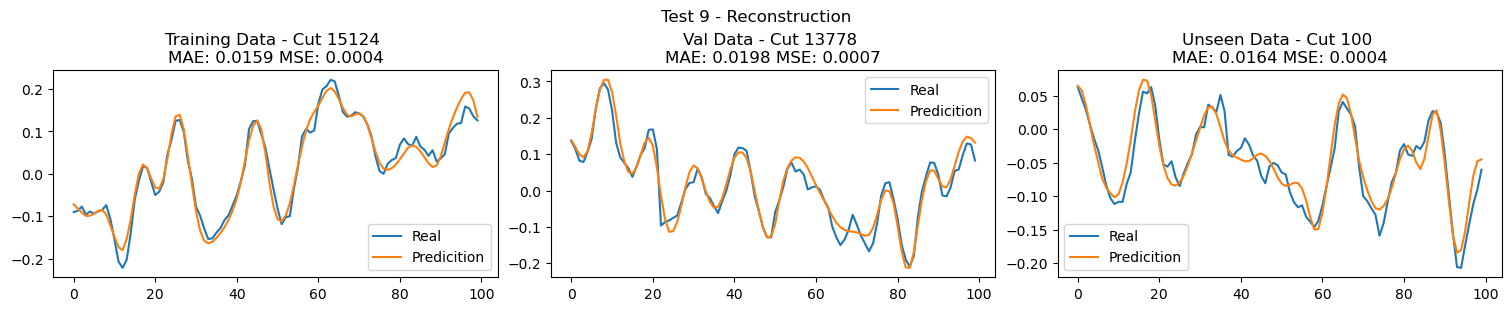

In [14]:
for test in exps:
    fig, ax = plt.subplots(1, 3, figsize=(15,3), constrained_layout=True)
    fig.suptitle(f'{autoe[test].RMS.exp_name} - Reconstruction')
    ax = ax.ravel()

    # Training plot
    ax[0] = autoe[test].pred_plot(autoe[test]._ind_tr[0], plt_ax=ax[0])
    ax[0].set_title(f'Training Data - Cut {autoe[test]._ind_tr[0]} \n{ax[0].get_title()}')

    # Validation plot
    ax[1] = autoe[test].pred_plot(autoe[test]._ind_val[0], plt_ax=ax[1])
    ax[1].set_title(f'Val Data - Cut {autoe[test]._ind_val[0]} \n{ax[1].get_title()}')

    # Unseen plot
    i = -100
    ax[2] = autoe[test].pred_plot(i, input=(autoe[test].data, autoe[test].pred), plt_ax=ax[2])
    ax[2].set_title(f'Unseen Data - Cut {i} \n{ax[2].get_title()}')

## Thresholds for anomaly detection of each model

In [15]:
for test in exps:
    autoe[test]._thres = None

In [16]:
for test in exps:
    autoe[test].thres


Cutoffs:
	MAE cutoff: 0.02133
	MSE cutoff: 0.00071
	R2 cutoff: 0.93982

Cutoffs:
	MAE cutoff: 0.01929
	MSE cutoff: 0.00058
	R2 cutoff: 0.92864

Cutoffs:
	MAE cutoff: 0.02071
	MSE cutoff: 0.00067
	R2 cutoff: 0.96041

Cutoffs:
	MAE cutoff: 0.01818
	MSE cutoff: 0.00054
	R2 cutoff: 0.84416


## Show scores against threshold

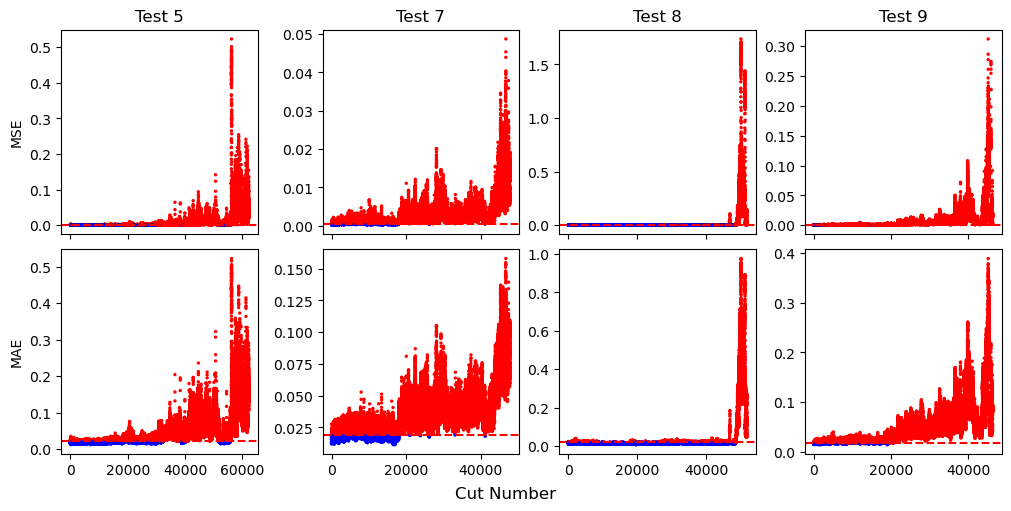

In [17]:
# metrics = ['mse', 'mae', 'r2']
metrics = ['mse', 'mae']

fig, ax = plt.subplots(len(metrics), len(exps),
                       figsize=(10, 5),
                       constrained_layout=True,
                    #    sharey= 'row',
                       sharex='col',
                       )
axes = fig.axes

for i, test in enumerate(exps):
    for j, met in enumerate(metrics):
        _ = autoe[test].scatter_scores([met], plt_ax=axes[(i + (j * len(exps)))])

        axes[(i)].set_title(test)
        axes[(len(exps) * j) + i].set_ylabel('')
        axes[(len(exps) * j) + i].set_xlabel('')
        if i == 0:
            axes[(len(exps) * j) + i].set_ylabel(f'{met.upper()}')

_ = fig.supxlabel('Cut Number')

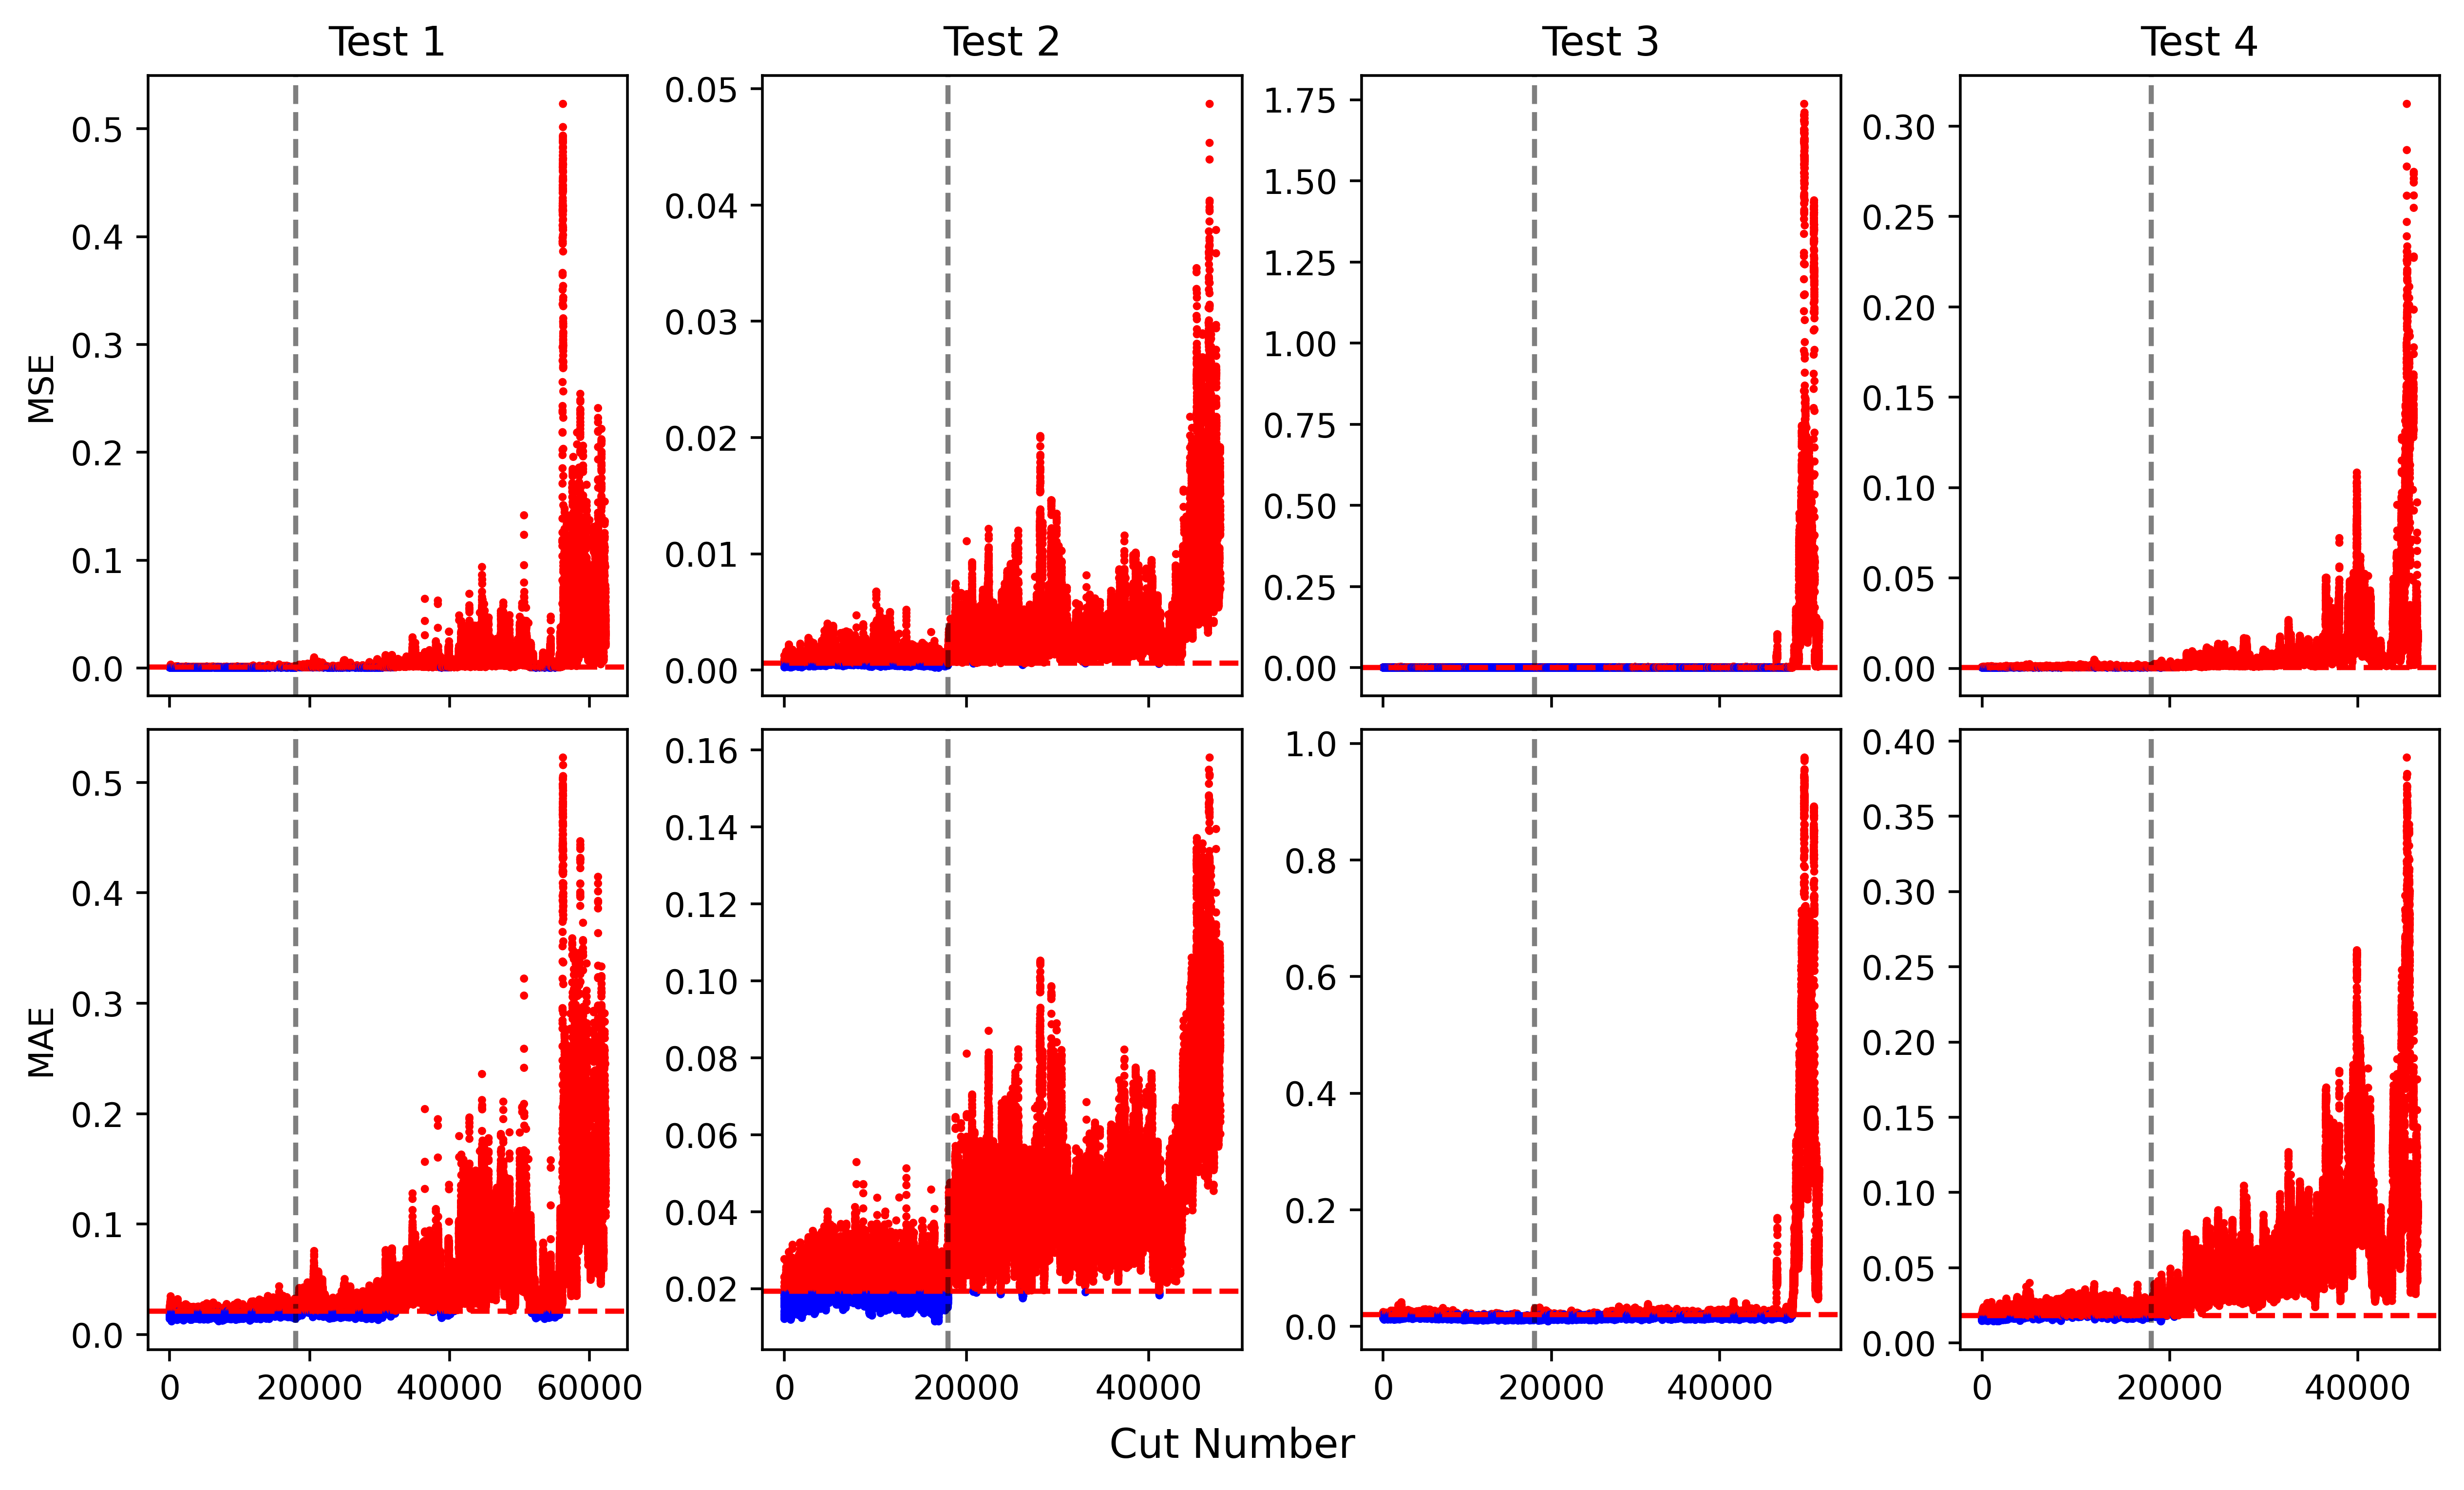

In [18]:
metrics = ['mse', 'mae']

fig, ax = plt.subplots(len(metrics), len(exps),
                       figsize=(10, 6),
                       constrained_layout=True,
                       sharex='col',
                       dpi=500
                       )
axes = fig.axes

for i, test in enumerate(exps):
    for j, met in enumerate(metrics):
        _ = autoe[test].scatter_scores([met], plt_ax=axes[(i + (j * len(exps)))])
        # score = autoe[test].scores[met]
        # axes[(i + (j * len(exps)))].scatter(x=range(len(score)),
        #                                     y=score,
        #                                     s=2,
        #                                     label=met,
        #                                     c='b'
        #                                     )

        axes[(len(exps) * j) + i].axvline(autoe[test]._train_slice.stop * 300,
                                    color='k',
                                    linestyle='--',
                                    alpha=0.5,
                                    )

        axes[(i + (j * len(exps)))].axhline(autoe[test].thres[met], color='r', linestyle='--')

        axes[(i)].set_title(f'Test {i+ 1}')
        axes[(len(exps) * j) + i].set_ylabel('')
        axes[(len(exps) * j) + i].set_xlabel('')
        if i == 0:
            axes[(len(exps) * j) + i].set_ylabel(f'{met.upper()}')

_ = fig.supxlabel('Cut Number')

In [19]:
dfs = [pd.DataFrame(autoe[test].scores) for test in exps]
df = pd.concat(dfs, keys=exps, names=['Test', 'Metrics'])
for test in exps:
    print(f'\n {test}')
    print(df.loc[test].describe())


 Test 5
                mae           mse            r2
count  62301.000000  62301.000000  62301.000000
mean       0.046632      0.007927      0.861601
std        0.046244      0.024003      0.153865
min        0.011987      0.000220     -2.779752
25%        0.020213      0.000657      0.846543
50%        0.027446      0.001256      0.909893
75%        0.053785      0.005248      0.939404
max        0.522566      0.523080      0.988445

 Test 7
                mae           mse            r2
count  47901.000000  47901.000000  47901.000000
mean       0.036295      0.002811      0.740697
std        0.018727      0.003602      0.169201
min        0.011493      0.000204     -0.407165
25%        0.022280      0.000818      0.630167
50%        0.032247      0.001710      0.750382
75%        0.043246      0.003104      0.890238
max        0.157995      0.048704      0.989874

 Test 8
                mae           mse            r2
count  51801.000000  51801.000000  51801.000000
mean       0.

## autoe models latent space

In [20]:
# for test in exps:
#     fig, ax = autoe[test].plot_latent_space()

## Wear measurements comparison

/tmp/ipykernel_8122/938869060.py:74: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


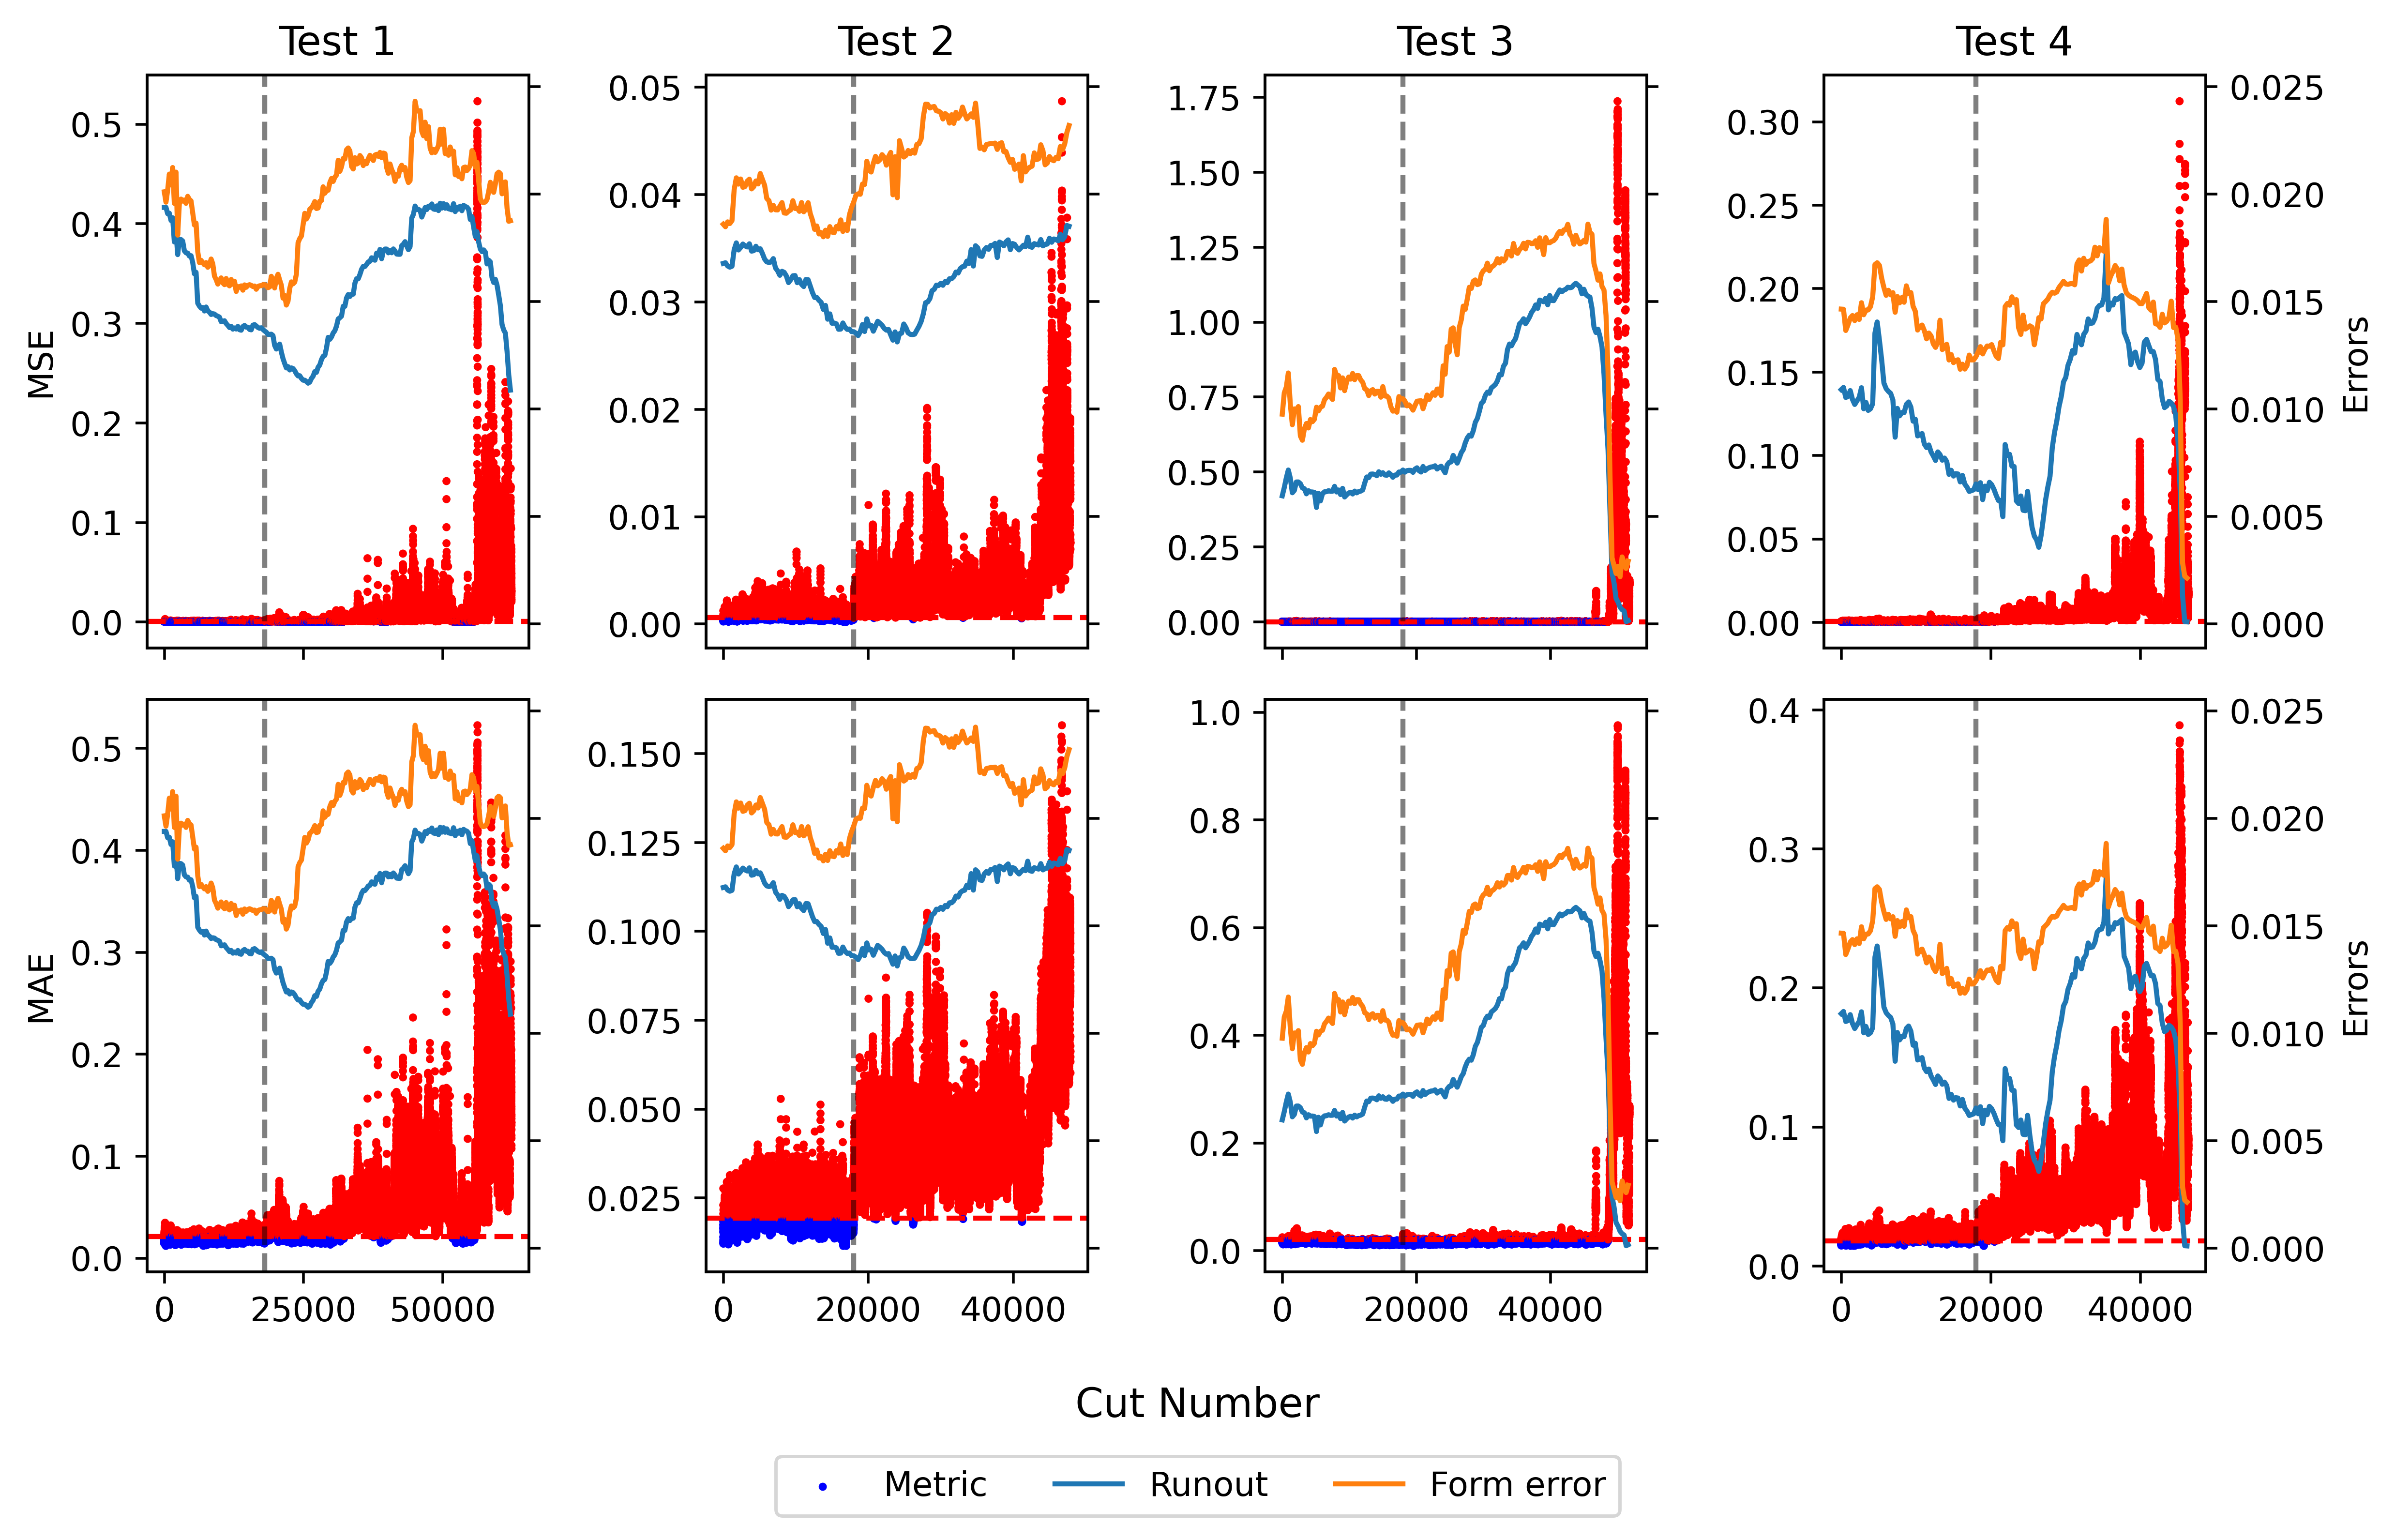

In [21]:
metric = ['mse', 'mae']
features = ['Runout', 'Form error']

fig, ax = plt.subplots(len(metric), len(exps),
                       figsize=(10, 6),
                       constrained_layout=True,
                    #    sharey= 'row',
                       sharex='col',
                       dpi=500,
                       )

ax2 = []

try:
    ax.ravel()
    for a in ax.ravel():
        ax2.append(a.twinx())
except AttributeError:
    ax2.append(ax.twinx())

for a, b in zip(ax2[1:], ax2[0:-1]):
    a.sharey(b)

if len(metric) * len(exps) > 1:
    ax2 = np.reshape(ax2, ax.shape)

axes = fig.axes
axes2 = axes[-(len(axes) // 2):]
axes = axes[0:(len(axes) // 2)]
for i, test in enumerate(exps):
    axes[i].set_title(f'Test {i + 1}')
    # axes[i].set_title(test)

    exp = resources.load(test)
    for j, met in enumerate(metric):
        _ = autoe[test].scatter_scores([met], plt_ax=axes[(i + (j * len(exps)))])

        # vert line to show where training data ends
        axes[(len(exps) * j) + i].axvline(autoe[test]._train_slice.stop * 300,
                                    color='k',
                                    linestyle='--',
                                    alpha=0.5,
                                    )

        for feature in features:
            feat = exp.features[feature].drop([0, 1, 2])
            if test == 'Test 5':
                feat = feat.drop([23, 24])
            # axes2[(len(exps) * j) + i].plot(range(len(feat)), feat, label=feature)
            axes2[(len(exps) * j) + i].plot(range(0, len(autoe[test].scores[met]), 300), feat, label=feature)

        axes[(len(exps) * j) + i].set_xlabel('')
        axes[(len(exps) * j) + i].set_ylabel('')
        if i == 0:
            axes[(len(exps) * j) + i].set_ylabel(f'{met.upper()}')
        if i ==len(exps) - 1:
            axes2[(len(exps) * j) + i].set_ylabel('Errors')

_ = fig.supxlabel('Cut Number')

for i, a in enumerate(axes2):
    if (i + 1) % len(exps) != 0:
        plt.setp(a.get_yticklabels(), visible=False)

l1, lab1 = axes[0].get_legend_handles_labels()
l2, lab2 = axes2[0].get_legend_handles_labels()

plt.figlegend(l1 + l2,
              ['Metric'] + lab2, 
              loc='upper center', 
              bbox_to_anchor=(0.5, 0),
              ncol=len(l1 + l2)
              )
plt.tight_layout()

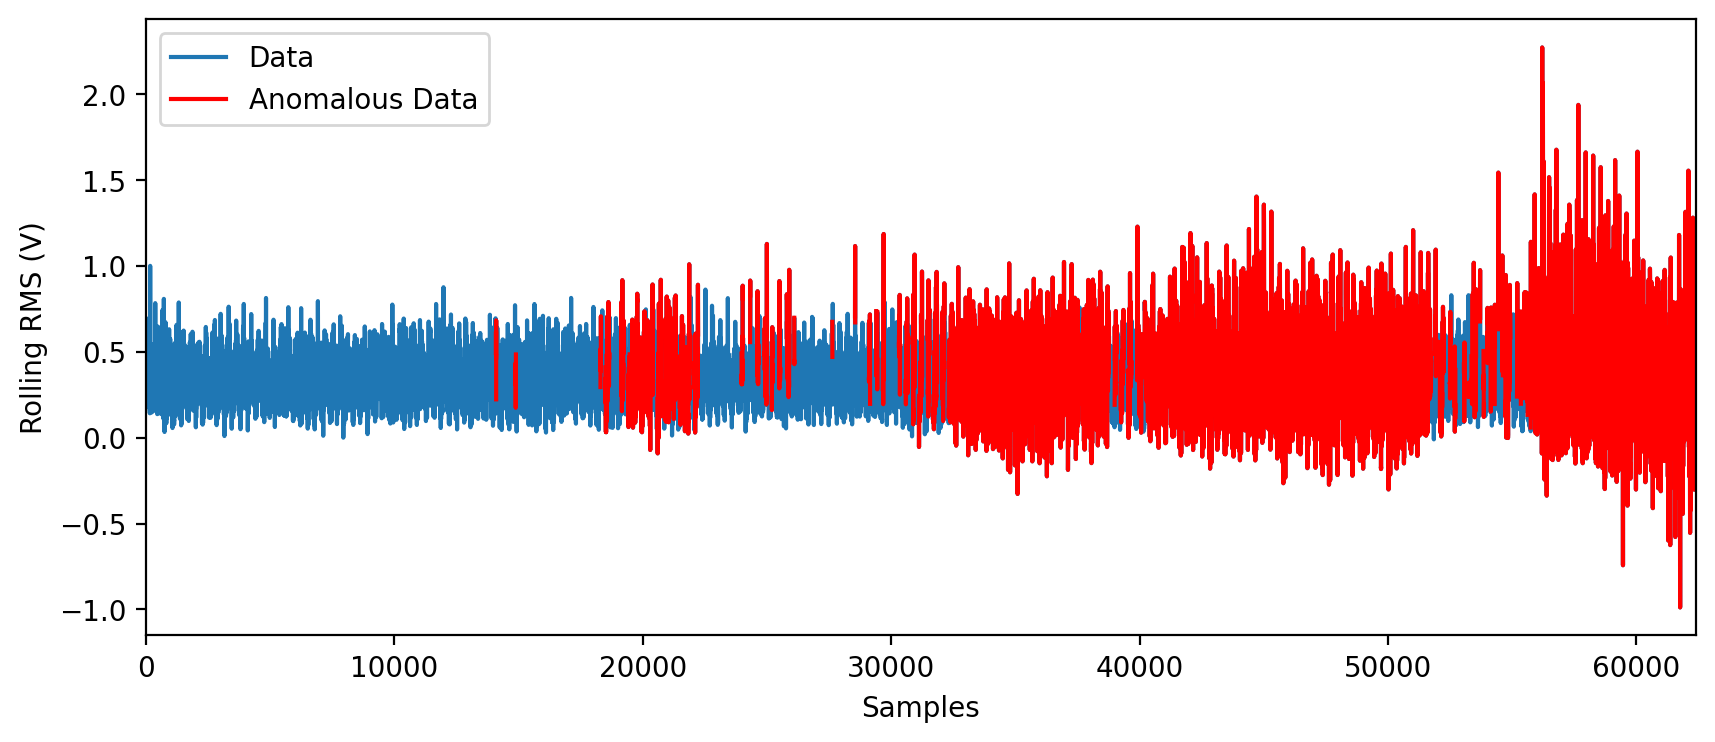

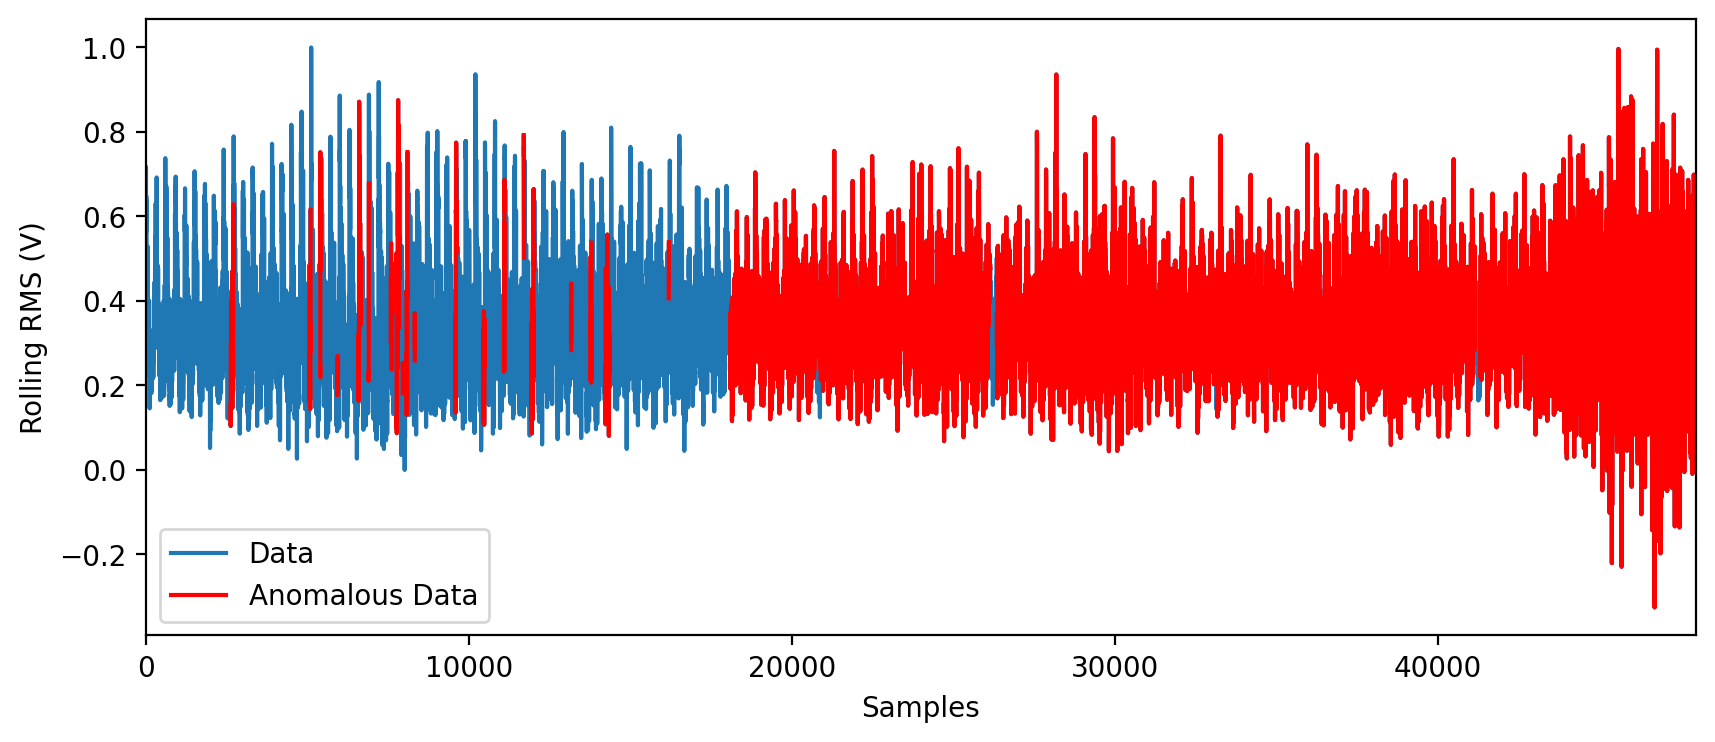

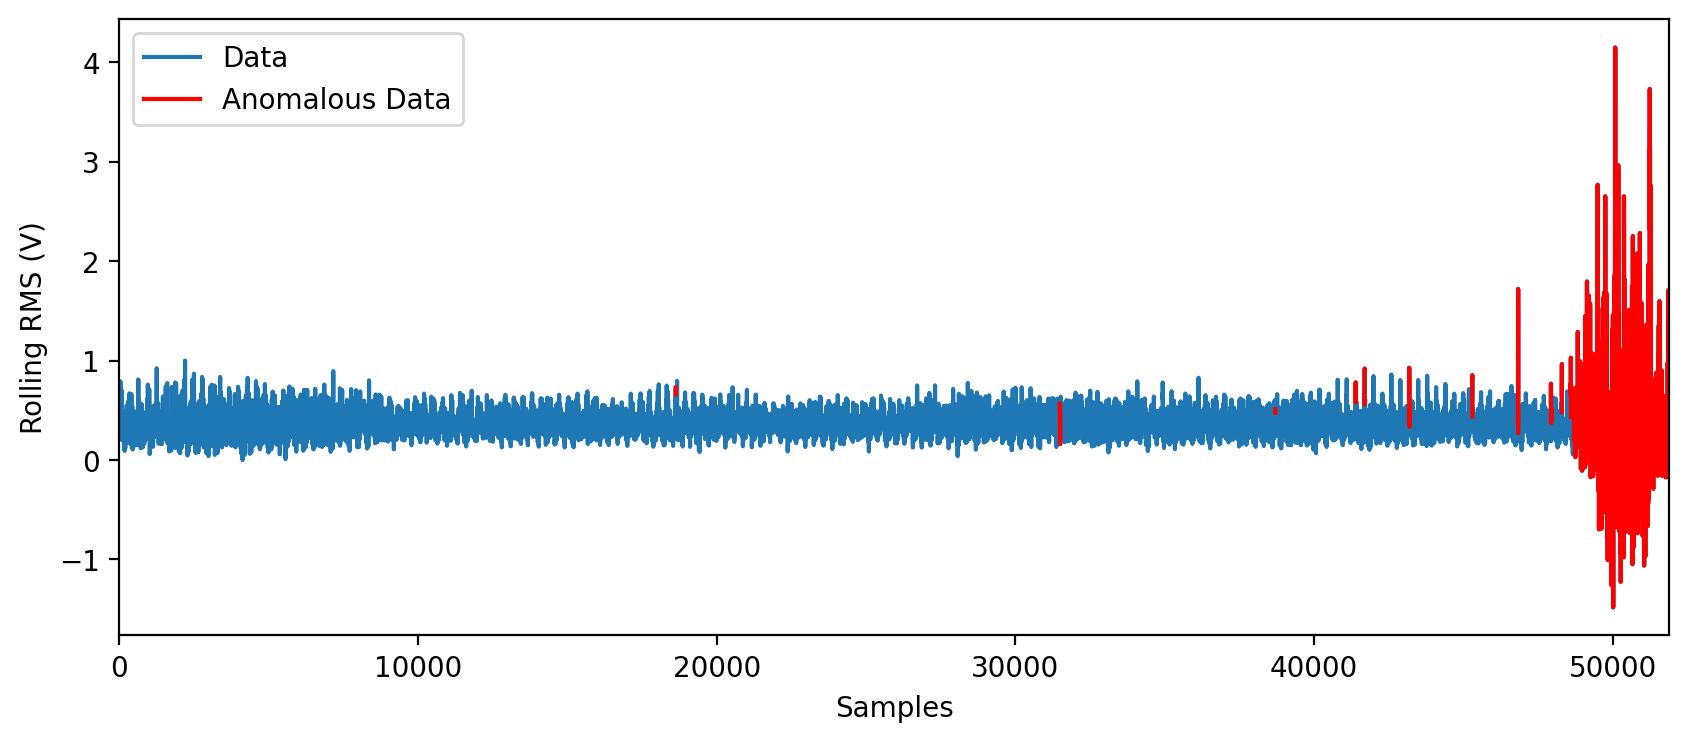

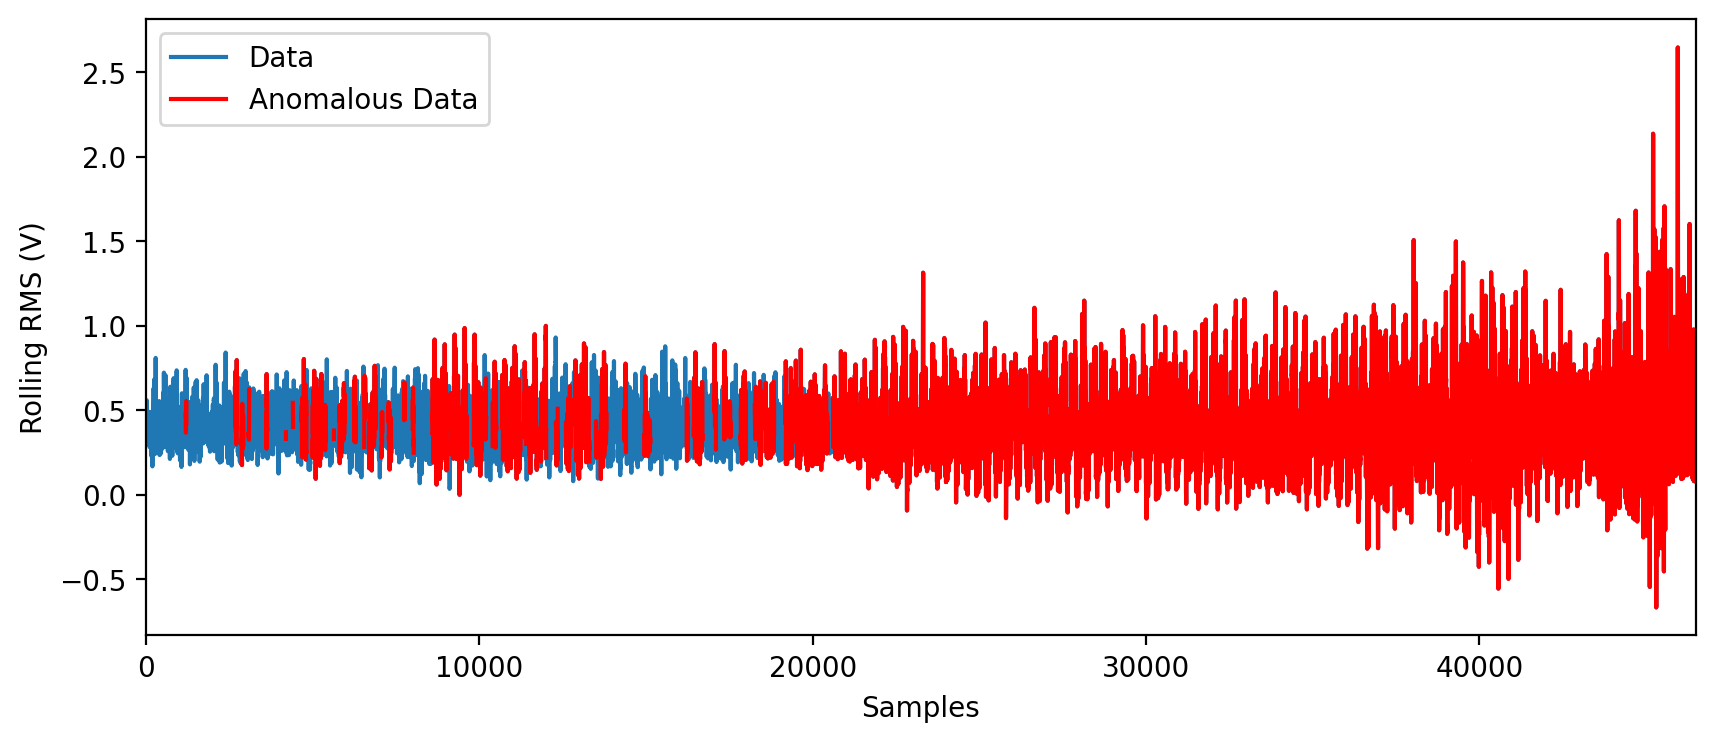

In [22]:
for test in exps:
    fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
    try:
        autoe[test].anom_plot(anomaly_metric='mse', plt_ax=ax)
    except AttributeError:
        pass

In [1]:
import seaborn as sns

fig, ax = plt.subplots(1, len(exps), figsize=(10,5), constrained_layout=True)
ax = ax.ravel()

for i, test in enumerate(exps):
    a = autoe[test]
    sc = a.scores['mse'][a.ind_tr]

    def mad_based_outlier(points, thresh=2):
        if len(points.shape) == 1:
            points = points[:,None]
        median = np.median(points, axis=0)
        diff = np.sum((points - median)**2, axis=-1)
        diff = np.sqrt(diff)
        med_abs_deviation = np.median(diff)

        modified_z_score = 0.6745 * diff / med_abs_deviation

        return modified_z_score > thresh

    outliers = sc[mad_based_outlier(sc)]
    print(np.min(outliers))

    sns.histplot(sc, ax=ax[i], kde=True, log_scale=False, bins=50)
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

NameError: name 'plt' is not defined